In [1]:
from utils import load_psf_and_image
from utils import plot_image
from utils import to_absolute_path
from matplotlib import pyplot as plt

In [2]:
ORIGINAL_IMAGE = "data/lensed/im172.npy"
DIFFUSER_IMAGE = "data/diffuser/im172.npy"
PSF = "data/psf.tiff"

psf, image = load_psf_and_image(psf_fp=to_absolute_path(PSF),
                                data_fp=to_absolute_path(DIFFUSER_IMAGE),
                                downsample=4, flip=True, normalize=True)

psf.shape

(1, 270, 480, 3)

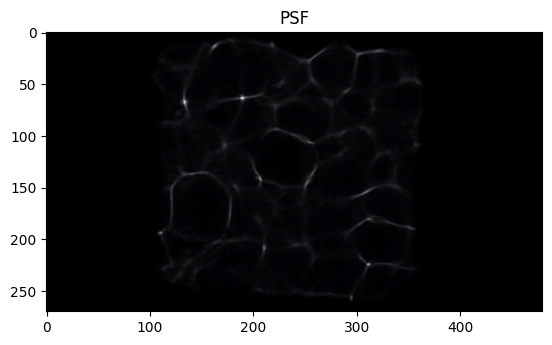

In [3]:
# plt.imshow(psf[0])  # will show a black image, needs gamma correction
plot_image(psf[0])
plt.title("PSF")
plt.show()

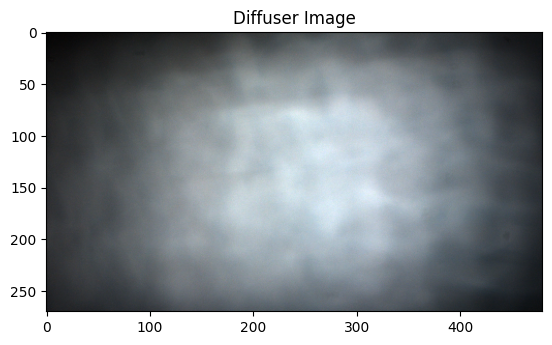

In [4]:
plot_image(image)
plt.title("Diffuser Image")
plt.show()

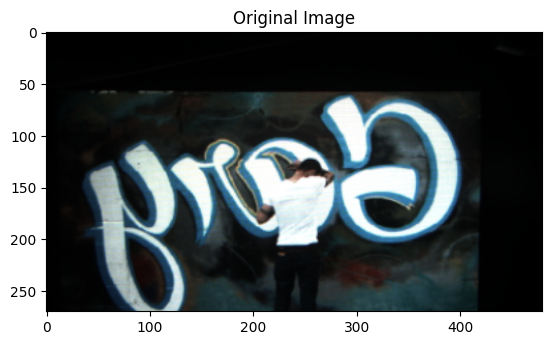

In [5]:
from utils import load_image

original = load_image(to_absolute_path(ORIGINAL_IMAGE))  #, shape=reconstructed.shape)
plot_image(original)
plt.title('Original Image')
plt.show()

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


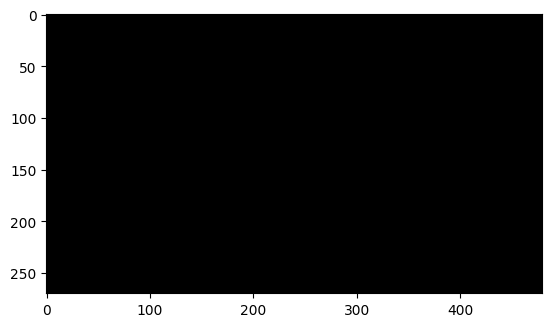

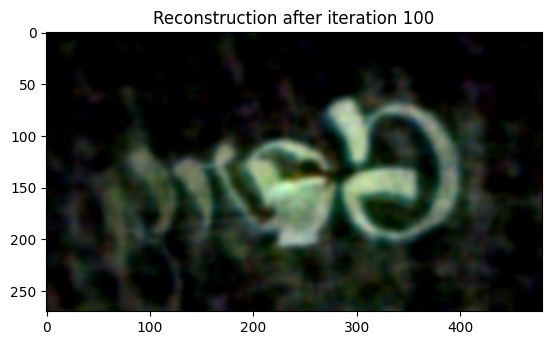

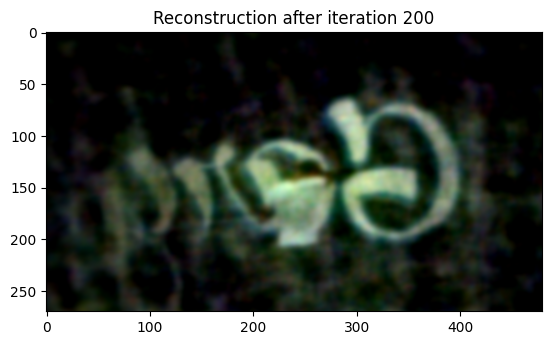

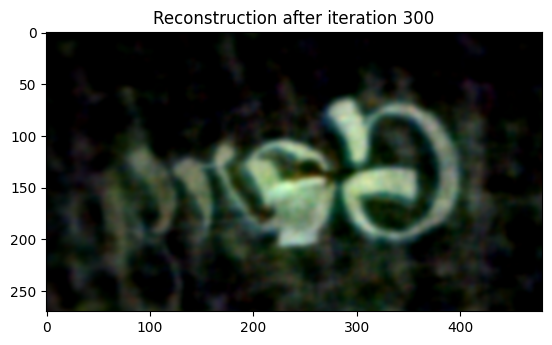

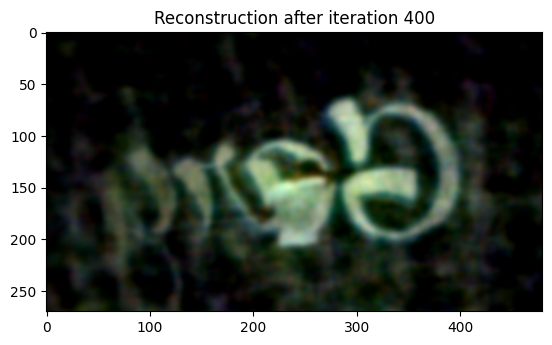

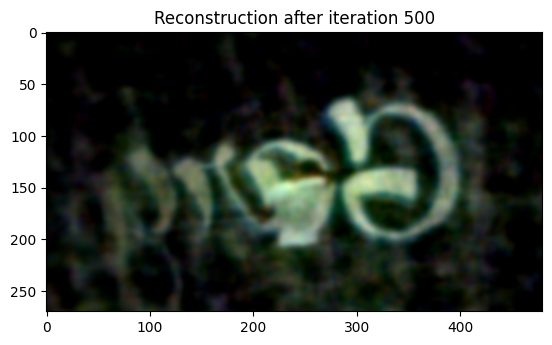

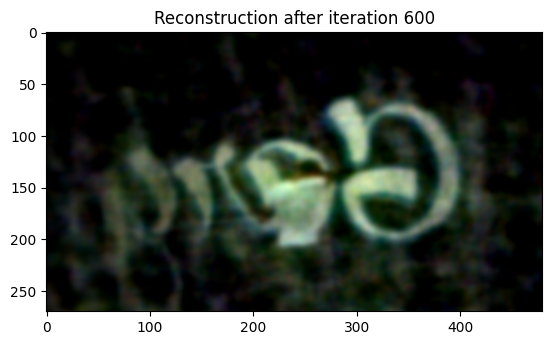

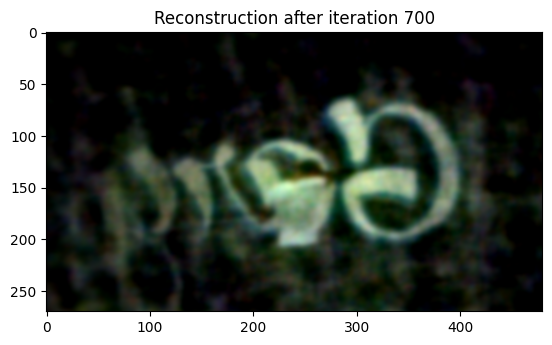

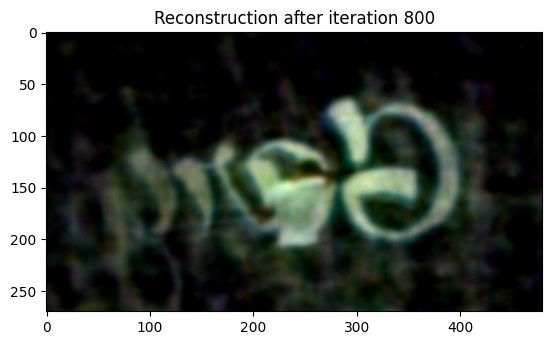

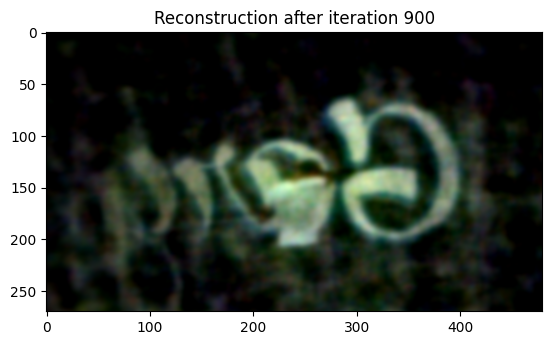

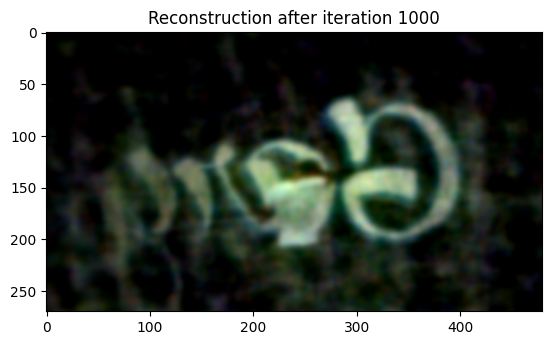

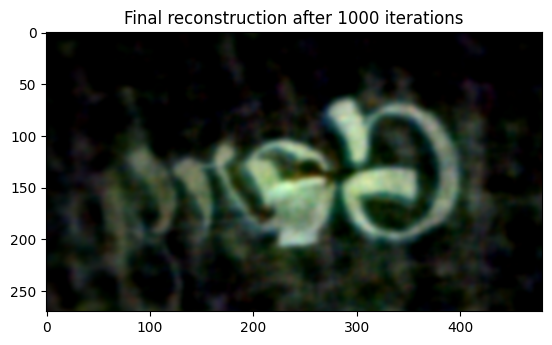

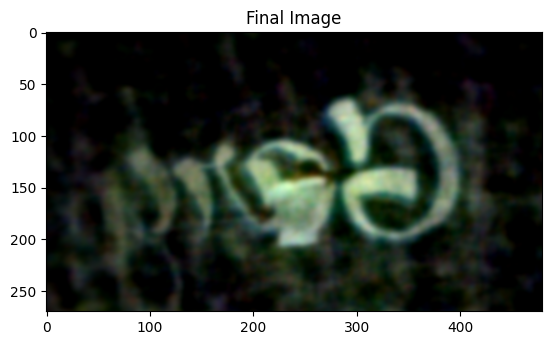

In [5]:
from algorithms.admm import ADMM

reconstructor = ADMM(psf)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=100)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


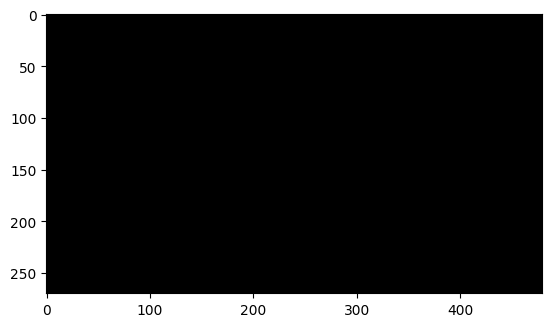

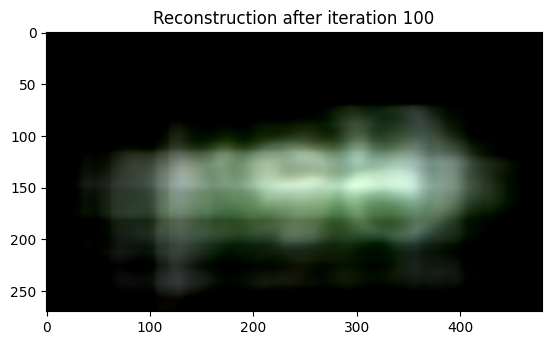

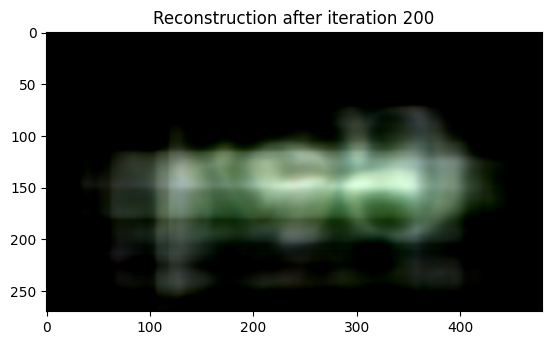

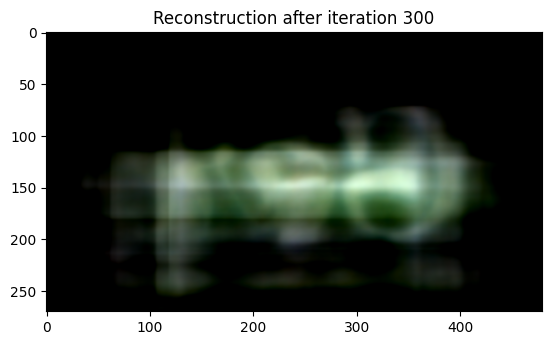

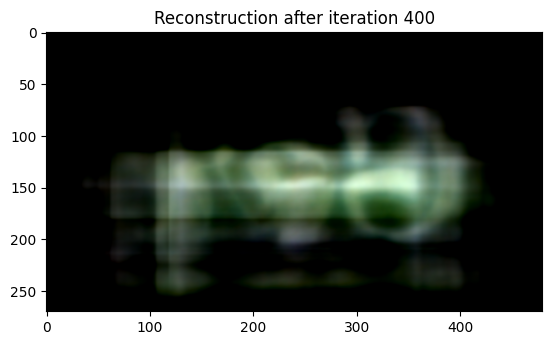

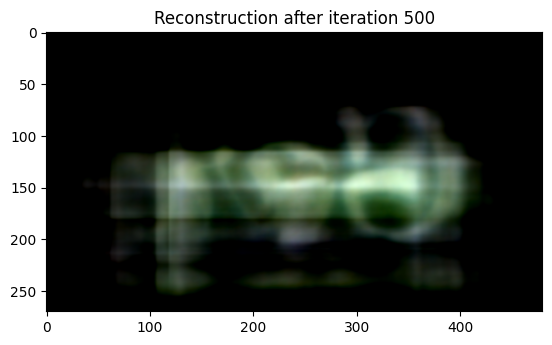

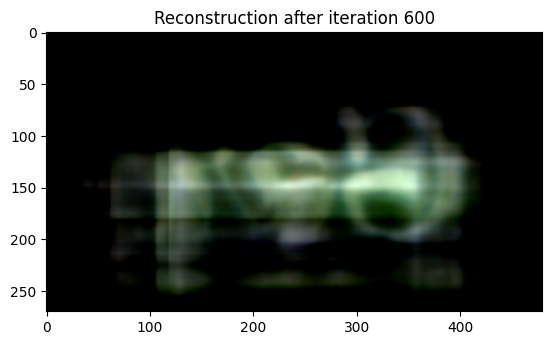

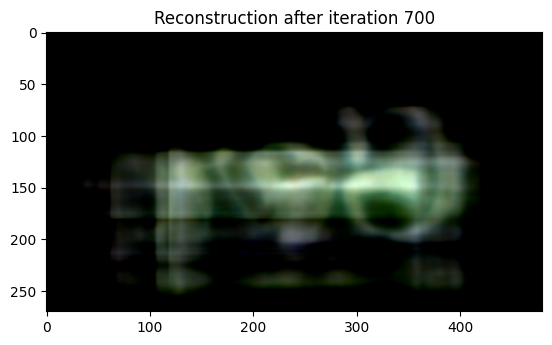

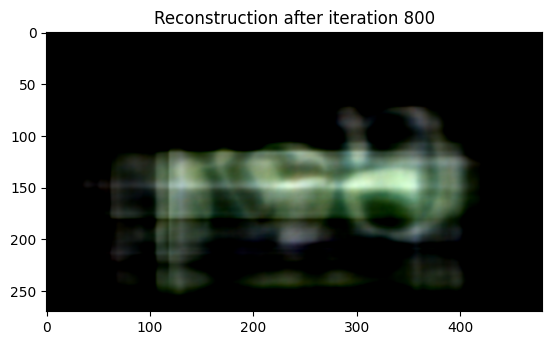

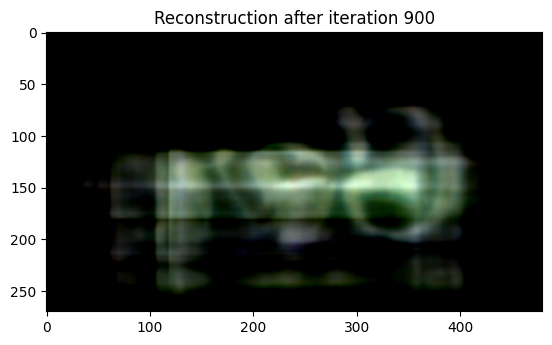

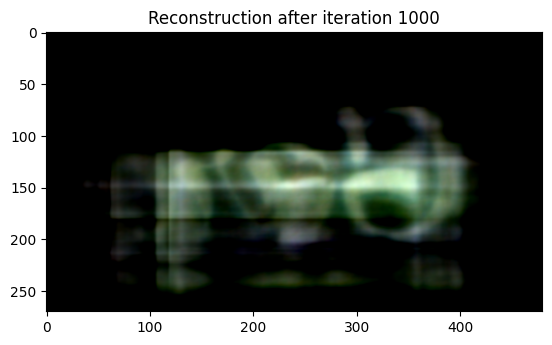

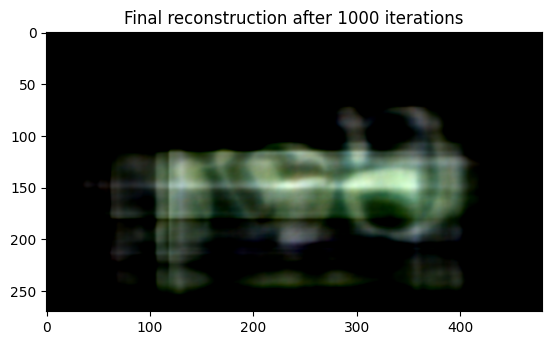

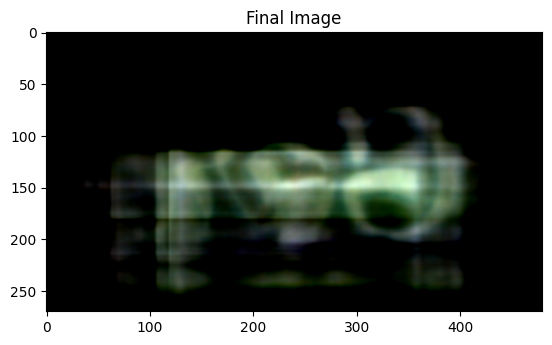

In [3]:
from algorithms.gradient_descent import gradient_descent

reconstructor = gradient_descent(psf)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=100)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


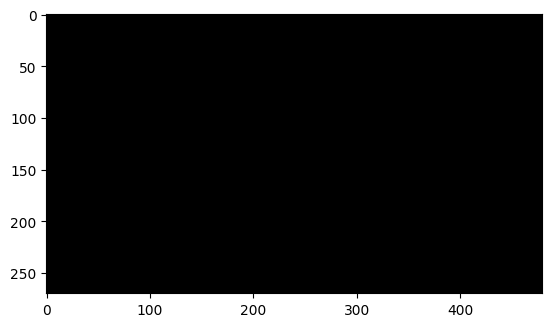

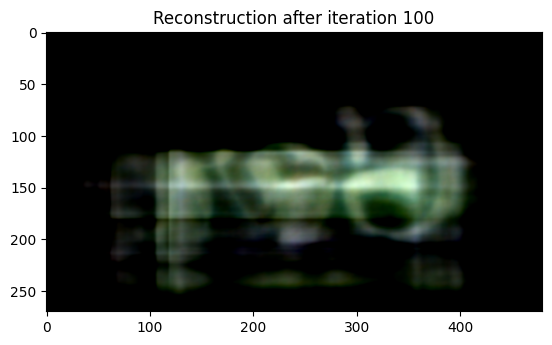

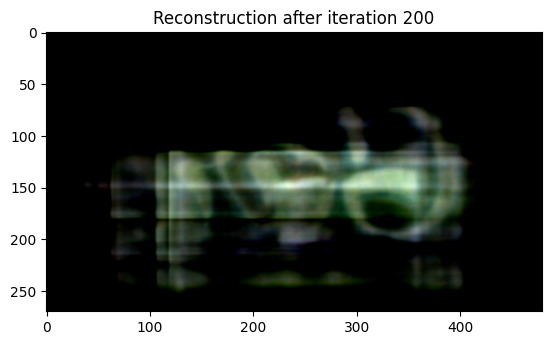

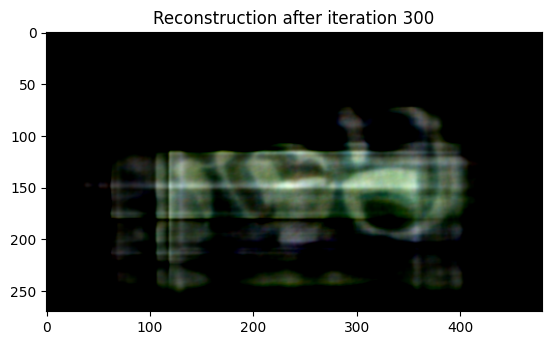

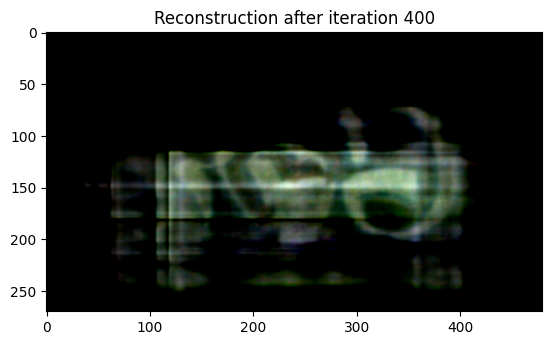

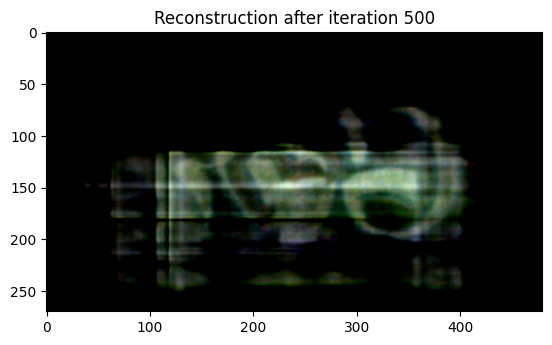

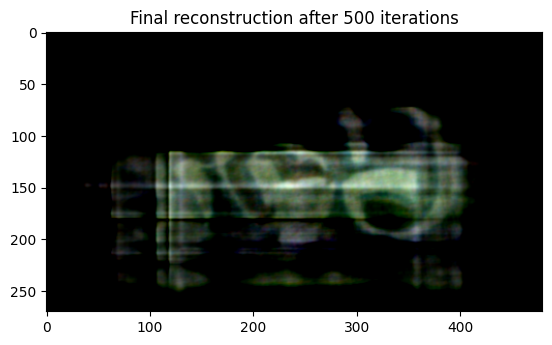

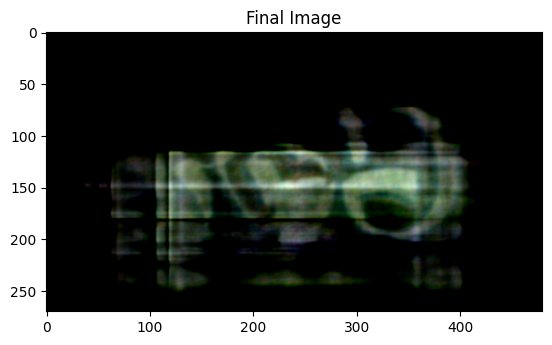

In [3]:
from algorithms.nesterov import nesterov_gradient_descent

reconstructor = nesterov_gradient_descent(psf)
reconstructed = reconstructor.apply(image, n_iter=500, disp_iter=100)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

/Users/ryanmei/Desktop/lenseless_imaging/utils.py:145: RuntimeWarning: invalid value encountered in divide
  img_norm[i] = disp_img[i] / max_val[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


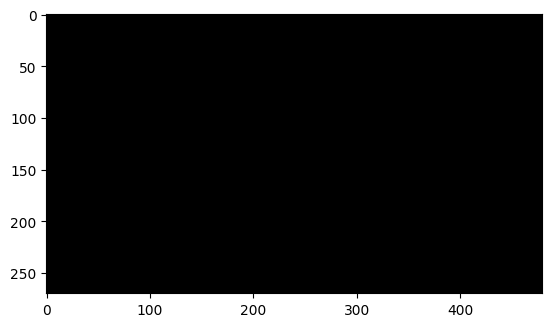

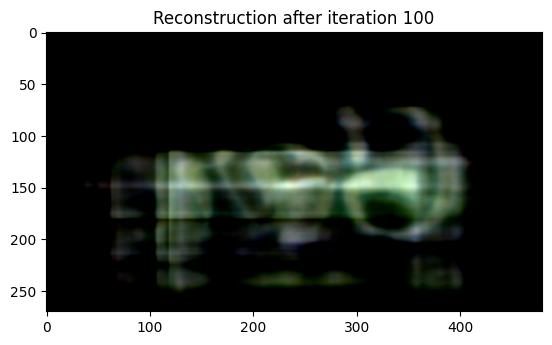

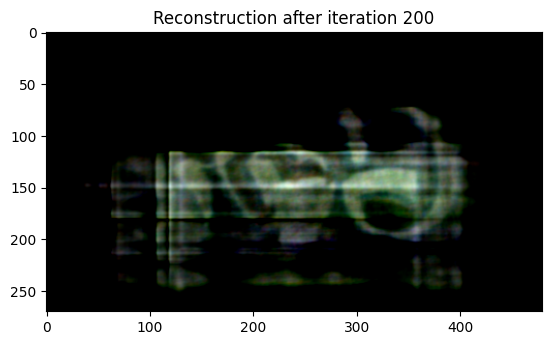

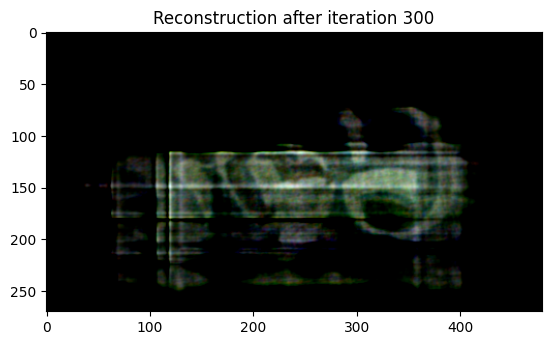

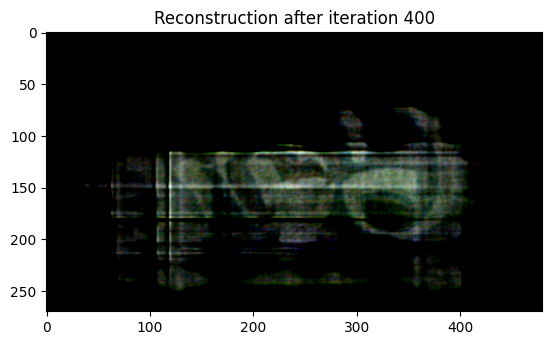

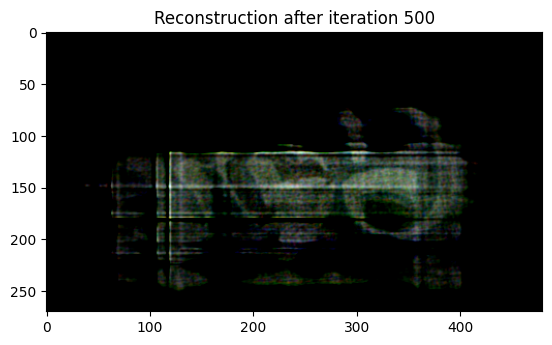

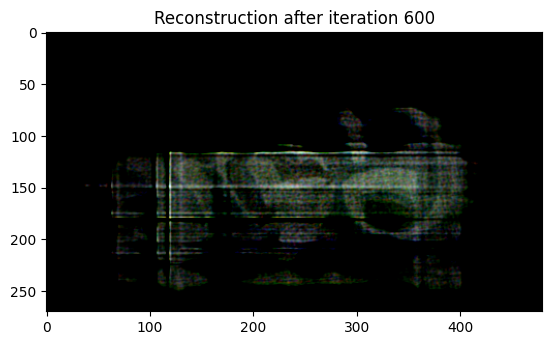

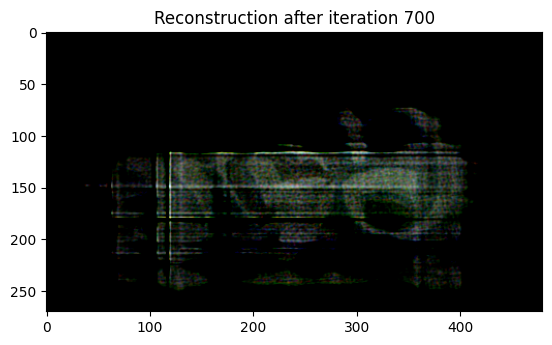

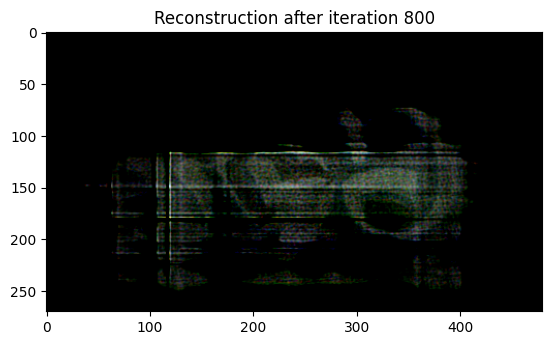

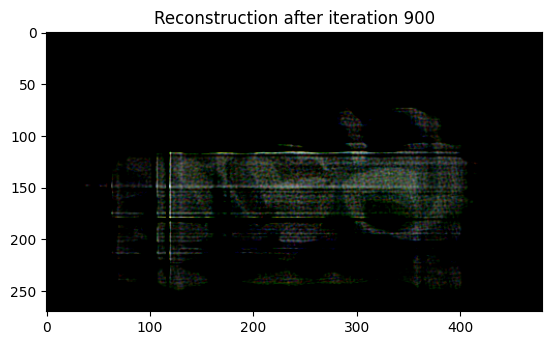

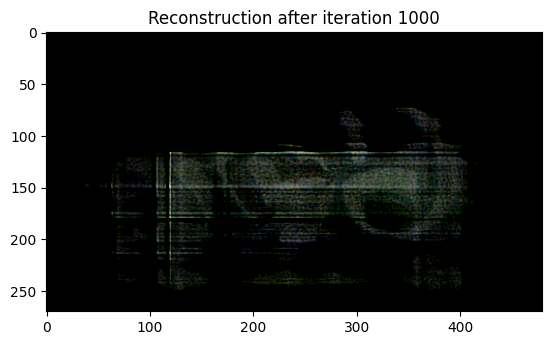

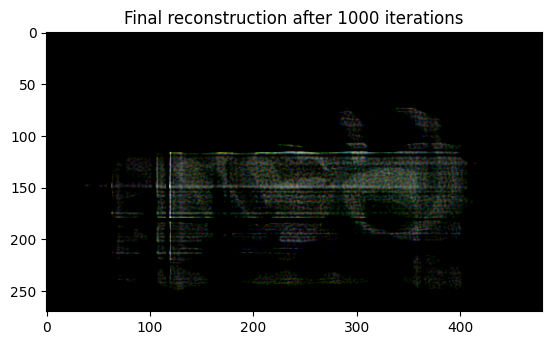

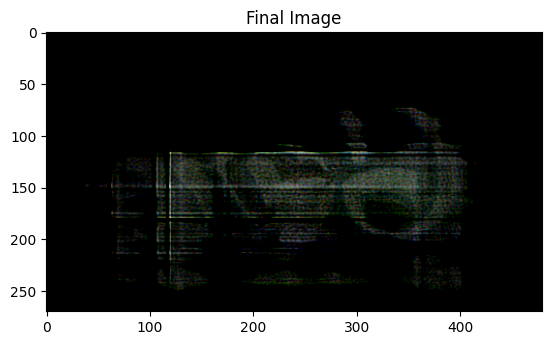

In [7]:
from algorithms.fista import FISTA

reconstructor = FISTA(psf)
reconstructed = reconstructor.apply(image, n_iter=1000, disp_iter=100)
plot_image(reconstructed[0]).set_title("Final Image")
plt.show()

In [6]:
import importlib
import algorithms.fista
importlib.reload(algorithms.fista)


<module 'algorithms.fista' from '/Users/ryanmei/Desktop/lenseless_imaging/algorithms/fista.py'>